In [12]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Data

In [13]:
data=pd.read_csv("kmtest.csv")

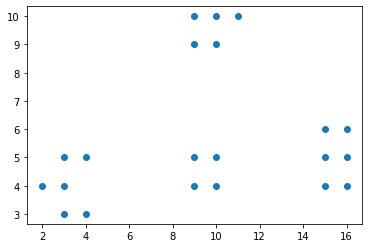

In [4]:
plt.scatter(data['column1'],data['column2'])

In [5]:
K=5
centroids=(data.sample(n=K))
centroids

,column1,column2
10,10,4
19,16,5
5,4,5
2,3,4
17,15,6


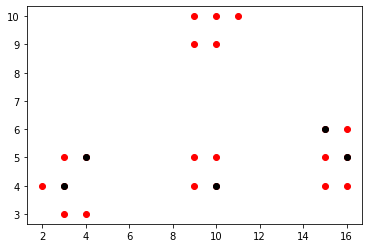

In [6]:
plt.scatter(data['column1'],data['column2'],c='r')
plt.scatter(centroids['column1'],centroids['column2'],c='k')

In [7]:
diff=1
j=0
while(diff!=0):
    XD=data
    i=1
    for index1,row_c in centroids.iterrows():
        Ed=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['column1']-row_d['column2'])**2
            d2=(row_c['column1']-row_d['column2'])**2
            d=sqrt(d1+d2)
            Ed.append(d)
        data[i]=Ed
        i=i+1
    C=[]
    for index,row in data.iterrows():
        min_distance=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_distance:
                min_distance=row[i+1]
                pos=i+1
        C.append(pos)
    data["Clust"]=C
    centroids_new=data.groupby(["Clust"]).mean()[["column2","column1"]]
    if j==0:
        diff=1
        j=j+1
    else:
        diff=(centroids_new['column2']-centroids['column2']).sum() + (centroids_new['column1'])
        print(diff.sum())
    centroids=data.groupby(['Clust']).mean()[["column2","column1"]]
    

23.514285714285712


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

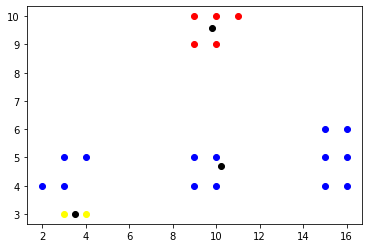

In [10]:
color=["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
for k in range(K):
    x=data[data["Clust"]==k+1]
    plt.scatter(x["column1"],x["column2"],c=color[k])
plt.scatter(centroids["column1"],centroids["column2"],color = 'black')
    

# Normalize The Data

In [43]:
import scipy.stats as stats

In [44]:
data2=pd.read_csv("kmtest.csv")

In [45]:
normalize=data2.apply(stats.zscore)

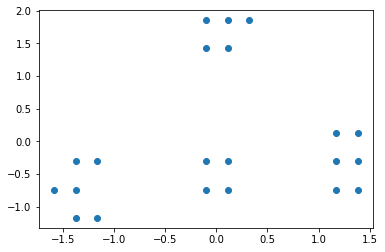

In [46]:
plt.scatter(normalize['column1'],normalize['column2'])

In [56]:
K=5
centroids=(normalize.sample(n=K))
centroids

,column1,column2,1,2,3,Clust,4
10,0.111287,-0.741362,1.145737,0.529793,1.506289,2,1.205829
2,-1.375915,-0.741362,1.145737,0.529793,1.506289,2,1.205829
6,-0.101170,-0.741362,1.145737,0.529793,1.506289,2,1.205829
12,0.111287,1.420945,1.912227,2.528171,1.551675,3,1.852135
9,-0.101170,1.853406,2.523820,3.139764,2.163268,3,2.463728


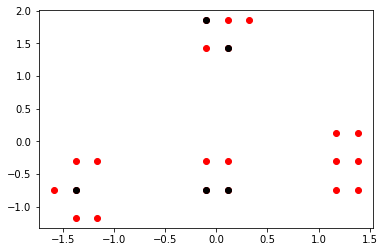

In [57]:
plt.scatter(normalize['column1'],normalize['column2'],c='r')
plt.scatter(centroids['column1'],centroids['column2'],c='k')

In [58]:
diff=1
j=0
while(diff!=0):
    XD=normalize
    i=1
    for index1,row_c in centroids.iterrows():
        Ed=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c['column1']-row_d['column2'])**2
            d2=(row_c['column1']-row_d['column2'])**2
            d=sqrt(d1+d2)
            Ed.append(d)
        normalize[i]=Ed
        i=i+1
    C=[]
    for index,row in normalize.iterrows():
        min_distance=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_distance:
                min_distance=row[i+1]
                pos=i+1
        C.append(pos)
    normalize["Clust"]=C
    centroids_new=normalize.groupby(["Clust"]).mean()[["column2","column1"]]
    if j==0:
        diff=1
        j=j+1
    else:
        diff=(centroids_new['column2']-centroids['column2']).sum() + (centroids_new['column1'])
        print(diff.sum())
    centroids=normalize.groupby(['Clust']).mean()[["column2","column1"]]
    

3.170679921668122


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

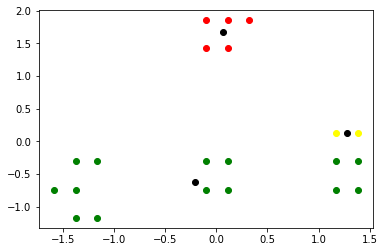

In [59]:
color=["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
for k in range(K):
    x=normalize[normalize["Clust"]==k+1]
    plt.scatter(x["column1"],x["column2"],c=color[k])
plt.scatter(centroids["column1"],centroids["column2"],color = 'black')
    

# Iris Dataset - Clustering using K means

In [88]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the data.

In [89]:
iris=load_iris()

In [90]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# Define your target and predictors.

In [91]:
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df['target']=pd.Series(iris.target)
df['target_names']=pd.Series(iris.target_names)
species = []
for i in range(len(df)):
    if df.iloc[i]['target'] == 0:
        species.append('setosa')
    elif df.iloc[i]['target'] == 1:
        species.append('versicolor')
    elif df.iloc[i]['target'] == 2:
        species.append('virginica')
df['Species'] = species

In [92]:
df

,sepal length,sepal width,petal length,petal width,target,target_names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN,virginica
146,6.3,2.5,5.0,1.9,2,NaN,virginica
147,6.5,3.0,5.2,2.0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,2,NaN,virginica


In [93]:
x=iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Let’s have a look at our data through a scatter plot.

Text(0, 0.5, 'Sepal length')

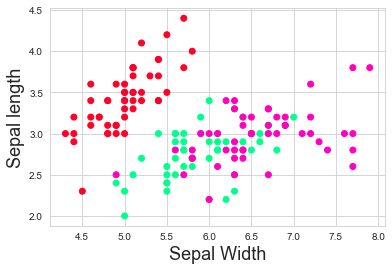

In [94]:
#Scatter plot of Sepal length & Width of Actual data set
# matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, 
# vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
#Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap='gist_rainbow')
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

In [95]:
#To start, let’s arbitrarily assign the value of k as 5. We will implement k-means clustering using k=5.
kmeans5 = KMeans(n_clusters=3,init = 'k-means++', random_state = 0)
y = kmeans5.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [96]:
kmeans5.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

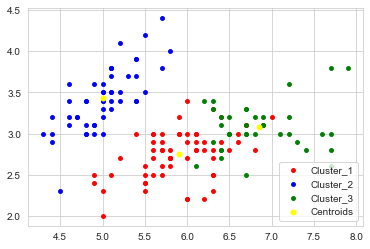

In [84]:
#x[y==0,0] finds all the rows of x that have a y value of 0 (y == 0), and are in the first column of X i.e sepal length
# Similarly  x[y==0,1] finds all the rows of x that have a y value of 0 (y == 0), and are in the second column of X i.e sepal width
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Cluster_3')
#plt.scatter(x[y == 3,0], x[y==3,1], s = 15, c= 'cyan', label = 'Cluster_4')
#plt.scatter(x[y == 4,0], x[y==4,1], s = 15, c= 'magenta', label = 'Cluster_5')

plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s = 25, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()
#plot.legend()

In [85]:
# As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.
# Let’s implement k-means again using k=3
kmeans3 = KMeans(n_clusters=4, random_state=21) #n_jobs = 4, n_jobs' was deprecated in version 0.23 and will be
y = kmeans3.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 0 0 0 0 2 0 0 0 3
 3 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 3 0 0 0 3 0 0 0 3 3
 0 3]


In [86]:
kmeans3.cluster_centers_

array([[6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

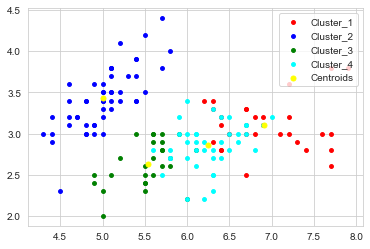

In [87]:
#Applying kmeans to the dataset / Creating the kmeans classifier
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(x[y == 3,0], x[y==3,1], s = 15, c= 'cyan', label = 'Cluster_4')
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 25, c = 'yellow', label = 'Centroids')

plt.legend()

plt.show()

# Comparing the actual Petal Length:3 & Petal Width:4 with predicted

Text(0.5, 1.0, 'Predicted')

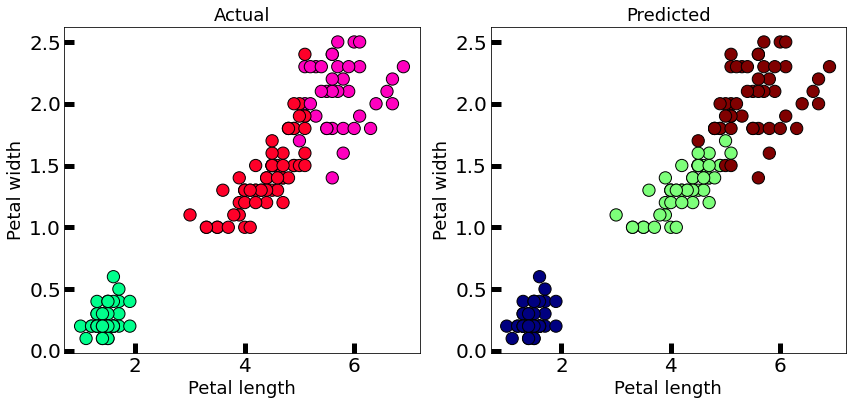

In [75]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['petal length'], y=df['petal width'], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(x=df['petal length'], y=df['petal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

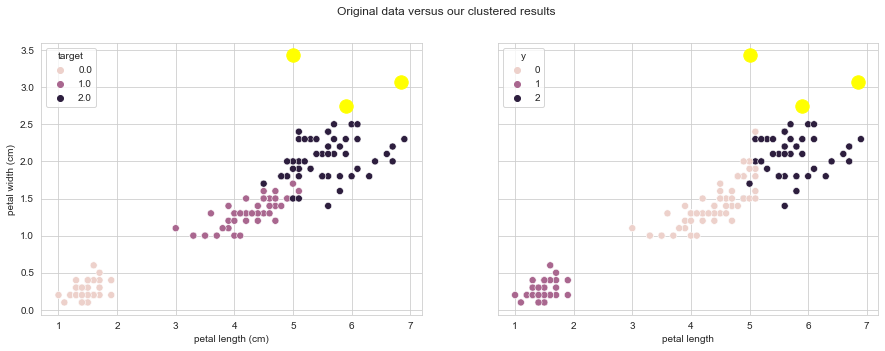

In [77]:
df2 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
import seaborn as sns
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Original data versus our clustered results')

sns.scatterplot(data=df2, ax=axes[0], x="petal length (cm)", y="petal width (cm)", hue="target",s=50)

#Now adding y column in df
df['y']=pd.Series(y)
sns.scatterplot(data=df, ax=axes[1], x="petal length", y="petal width", hue="y",s=50)
#centers
axes[0].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')
axes[1].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')